# **Data Analysis of Cricket Match Dataset: Test Nations (1877–2025):**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import sys
import warnings
from datetime import datetime
warnings.filterwarnings("ignore") # Ignore warnings
import re

In [2]:
from data_analysis_pipeline import data_engineering

data= data_engineering()
data.shape

(7002, 19)

In [3]:
data.head()

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,2007-Nov,5,2007,Nov,India,False,6.0,0.0,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,2006-Jan,4,2006,Jan,Pakistan,False,0.0,341.0,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,2005-Mar,5,2005,Mar,India,False,0.0,168.0,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,2005-Mar,5,2005,Mar,India,False,0.0,195.0,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,2004-Apr,4,2004,Apr,Pakistan,False,0.0,131.0,False


In [4]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

## 1. **Match Count by Format:**

In [5]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

In [6]:
# 1. Match Count by Format: 
# Group by format and count matches
format_counts = data['format'].value_counts().reset_index()
format_counts.columns = ['Format', 'Count']

In [7]:
format_counts

,Format,Count
0,ODI,4130
1,Test,1790
2,T20I,1082


In [8]:
# Calculate percentages
total_matches = format_counts['Count'].sum()
format_counts['Percentage'] = (format_counts['Count'] / total_matches * 100).round(1)
format_counts

,Format,Count,Percentage
0,ODI,4130,59.0
1,Test,1790,25.6
2,T20I,1082,15.5


In [9]:
# Display the counts and percentages
print("Match Count by Format:")
print(format_counts)
print(f"Total Matches: {total_matches}")

Match Count by Format:
  Format  Count  Percentage
0   ODI    4130        59.0
1  Test    1790        25.6
2  T20I    1082        15.5
Total Matches: 7002


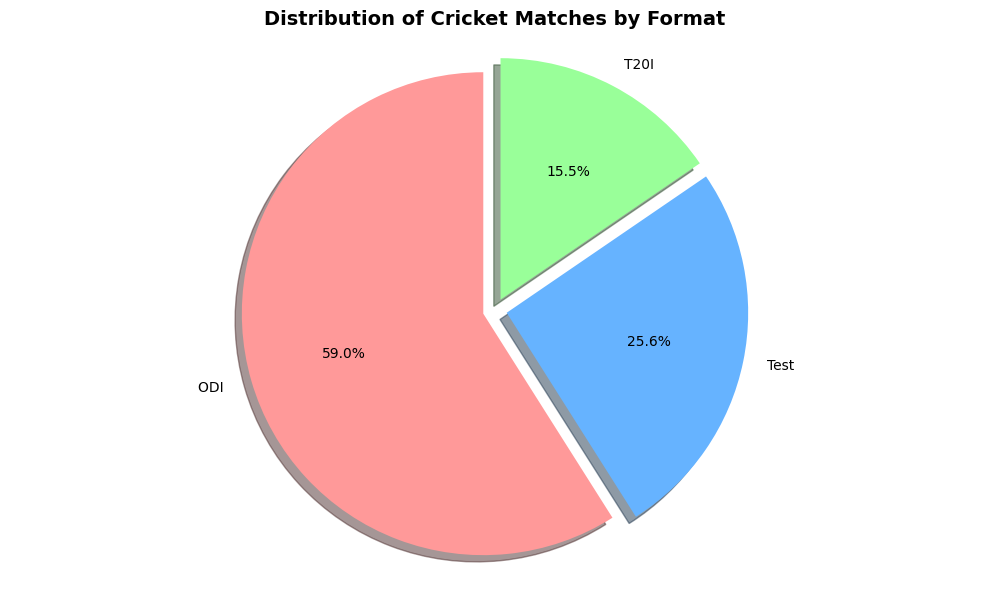

In [10]:
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(format_counts['Count'], 
        labels=format_counts['Format'], 
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99'],
        explode=[0.05]*len(format_counts),
        shadow=True)
plt.title('Distribution of Cricket Matches by Format', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

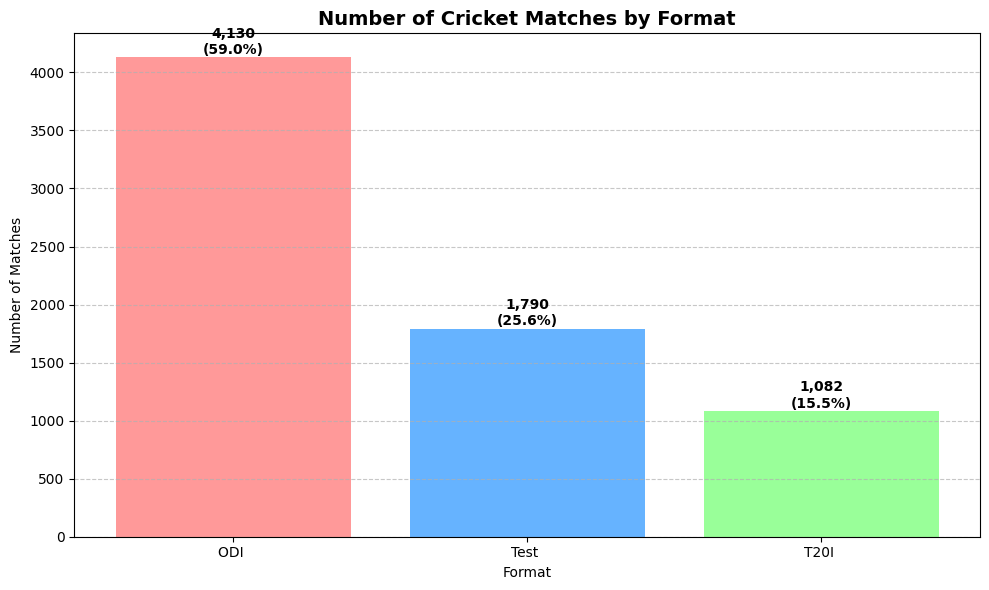

In [11]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(format_counts['Format'], format_counts['Count'], color=['#ff9999','#66b3ff','#99ff99'])

# Add count and percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:,}\n({height/total_matches:.1%})',
             ha='center', va='bottom', fontweight='bold')

plt.title('Number of Cricket Matches by Format', fontsize=14, fontweight='bold')
plt.xlabel('Format')
plt.ylabel('Number of Matches')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart shows the distribution of cricket matches by format. ODI is the most played format with `4,130 matches (59%)`, followed by Test matches with 1,790 (25.6%), and T20I with 1,082 (15.5%). 

This indicates ODIs dominate cricket match formats.

In [12]:
# Conclusion
print("\nConclusion:")
most_played = format_counts.iloc[0]['Format']
print(f"The most played format is {most_played} with {format_counts.iloc[0]['Count']} matches ({format_counts.iloc[0]['Percentage']}% of total).")
print(f"This suggests that resource allocation should prioritize {most_played} matches, \n while still maintaining appropriate support for other formats.")


Conclusion:
The most played format is ODI  with 4130 matches (59.0% of total).
This suggests that resource allocation should prioritize ODI  matches, 
 while still maintaining appropriate support for other formats.


----

## 2. **Match Count Over Time:**

In [13]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

In [14]:
data.head(5)

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,2007-Nov,5,2007,Nov,India,False,6.0,0.0,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,2006-Jan,4,2006,Jan,Pakistan,False,0.0,341.0,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,2005-Mar,5,2005,Mar,India,False,0.0,168.0,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,2005-Mar,5,2005,Mar,India,False,0.0,195.0,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,2004-Apr,4,2004,Apr,Pakistan,False,0.0,131.0,False


In [15]:
# Group by year and count matches
yearly_counts = data.groupby('year').size().reset_index(name= "Count")

# Display the first few rows to verify
print("Match Count by Year:")
print(yearly_counts)

Match Count by Year:
     year  Count
0       0     29
1    1877      2
2    1879      1
3    1880      1
4    1882      3
..    ...    ...
130  2021    192
131  2022    241
132  2023    227
133  2024    219
134  2025     53

[135 rows x 2 columns]


Here, `year= 0` means, `before 1877`.

In [16]:
# Squeeze year= 0 to some hypothetical value say 1850 for better plotting experience
# Here, year=0 means before 1877. Otherwise a huge gap between 0 and 1877 makes x-axis hectic
#yearly_counts.loc[yearly_counts['year'] == 0, 'year'] = 1850

# Using repalce replace 0 by 1850 inplace= True:
yearly_counts['year'].replace(0, 1850, inplace=True)

In [17]:
# Making permanant changes to year column: 
data["year"].replace(0, 1850, inplace=True)

In [18]:
data["year"].describe()

count    7002.000000
mean     2001.331477
std        23.397247
min      1850.000000
25%      1995.000000
50%      2006.000000
75%      2016.000000
max      2025.000000
Name: year, dtype: float64

Nice!

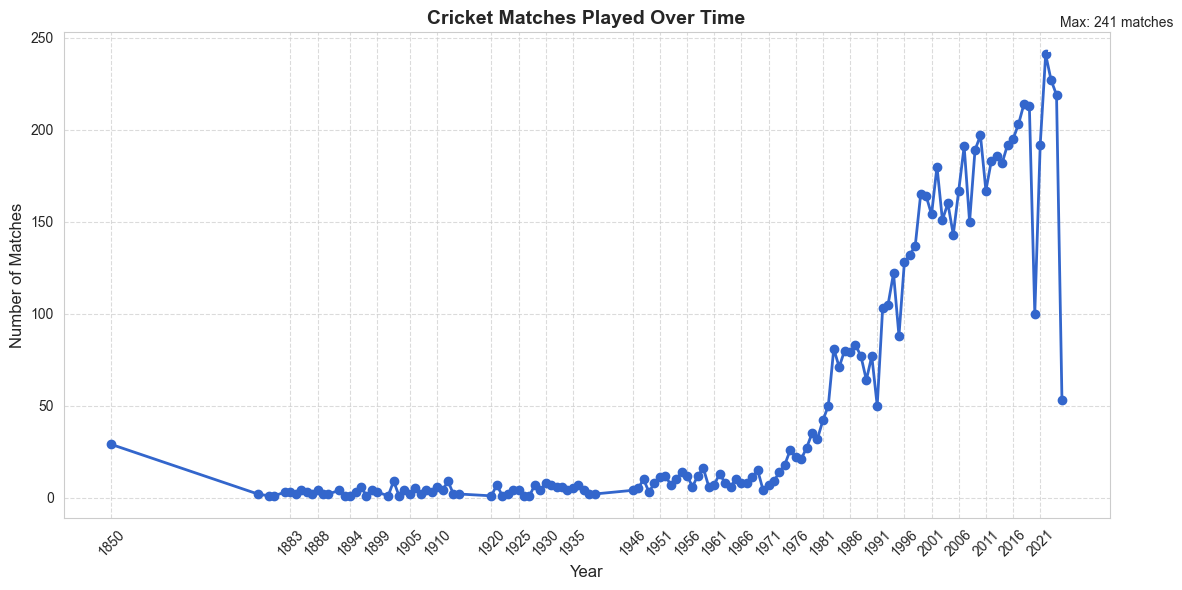

In [19]:
# Create a line chart for overall trend
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(yearly_counts['year'], yearly_counts['Count'], marker='o', linestyle='-', linewidth=2, color='#3366cc')

# Add title and labels
plt.title('Cricket Matches Played Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Improve x-axis ticks
plt.xticks(yearly_counts['year'][::5], rotation=45)  # Show every 5th year

# Add annotations for significant points
max_year = yearly_counts.loc[yearly_counts['Count'].idxmax()]
min_year = yearly_counts.loc[yearly_counts['Count'].idxmin()]

plt.annotate(f'Max: {max_year["Count"]} matches', 
             xy=(max_year['year'], max_year['Count']),
             xytext=(10, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.tight_layout()
plt.show()

The chart illustrates the number of cricket matches played over time. Initially, there were very few matches before 1950, with a gradual increase starting in the 1970s. A significant rise is observed from the 1990s onward, peaking around 2015 with 241 matches. 

The recent years show fluctuations, possibly due to external factors like scheduling changes or global events. This trend highlights the growing popularity of cricket over time, with a sharp increase in modern decades.

A decline from 1850s to 1883 in negligible as we have aggregated the number of matches played from the ancent time to 1880s with the year 1850. Consider that the curve is flat and overlaps with x-axis before 1880s.

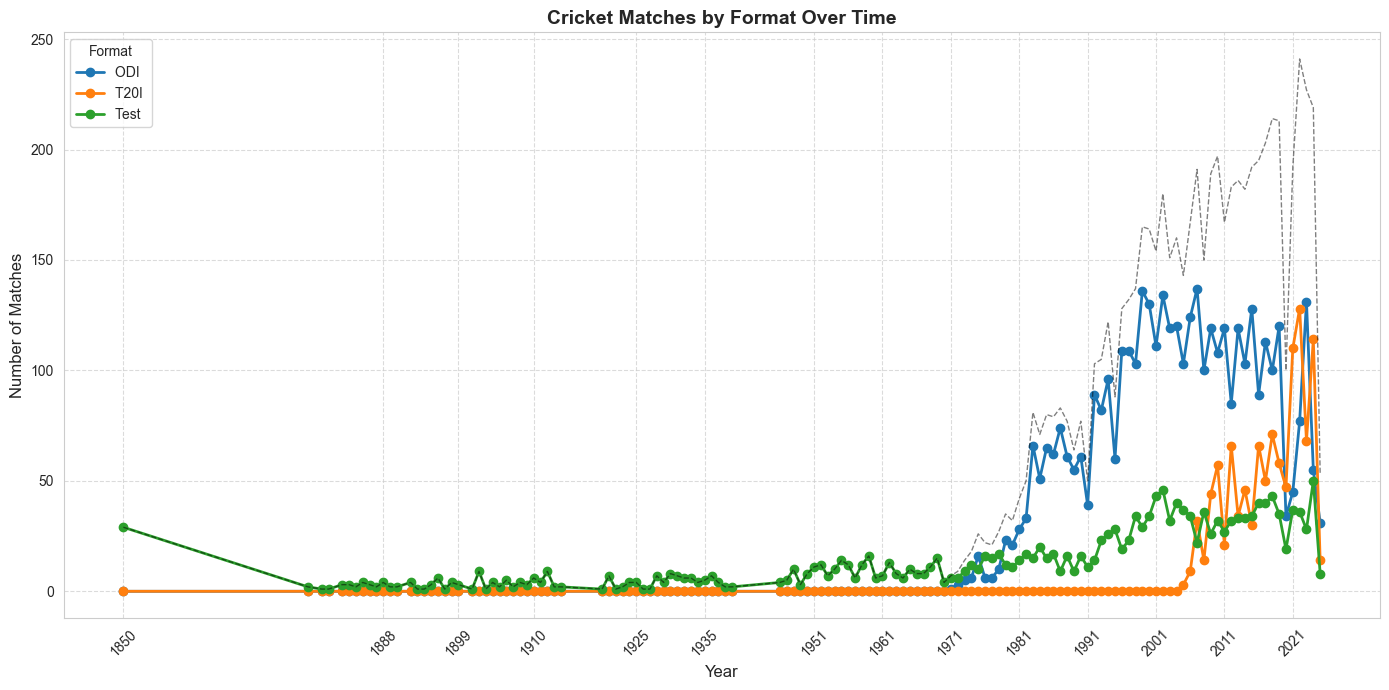

In [20]:
# Create a line chart showing trends by format over time
format_yearly = data.groupby(['year', 'format']).size().reset_index(name='Count')

# Pivot the data for easier plotting
format_pivot = format_yearly.pivot(index='year', columns='format', values='Count').fillna(0)

# Plot the data
plt.figure(figsize=(14, 7))
for column in format_pivot.columns:
    plt.plot(format_pivot.index, format_pivot[column], marker='o', linewidth=2, label=column)

plt.title('Cricket Matches by Format Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.legend(title='Format')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(format_pivot.index[::5], rotation=45)  # Show every 5th year

# Add a trend line for total matches
plt.plot(yearly_counts['year'], yearly_counts['Count'], 'k--', alpha=0.5, linewidth=1, label='Total')
# Improve x-axis ticks
plt.xticks(yearly_counts['year'][::10], rotation=45)  # Show every 5th year
plt.tight_layout()
plt.show()

The plot shows the number of cricket matches played over time, categorized by formats (`ODI`, `T20I`, and `Test`). 

1. **`Test Matches`**:   
Test cricket dominated the early years, starting in 1877 or before, with steady but low match counts until the 1970s. A gradual increase is observed post-1970, but the growth is slower compared to other formats.

2. **`ODI Matches`**:   
ODIs emerged in the 1970s and quickly gained popularity, surpassing Test matches by the 1980s. The format saw consistent growth, peaking around 2015, and remains the most played format.

3. **`T20I Matches`**:   
T20Is began in the early 2000s and experienced rapid growth, reflecting their increasing popularity. However, their match count remains lower than ODIs but has surpassed Test matches in recent years.

4. **`Overall Trends`**:   
The dashed line representing total matches shows a sharp increase from the 1990s, peaking around 2015. Recent fluctuations may be due to external factors like scheduling changes or global events.

This highlights the evolution of cricket formats, with ODIs dominating, T20Is growing rapidly, and Test matches maintaining a steady presence.

In [21]:
# Calculate growth rates
yearly_counts['Growth'] = yearly_counts['Count'].pct_change() * 100
yearly_counts

,year,Count,Growth
0,1850,29,NaN
1,1877,2,-93.103448
2,1879,1,-50.000000
3,1880,1,0.000000
4,1882,3,200.000000
...,...,...,...
130,2021,192,92.000000
131,2022,241,25.520833
132,2023,227,-5.809129
133,2024,219,-3.524229


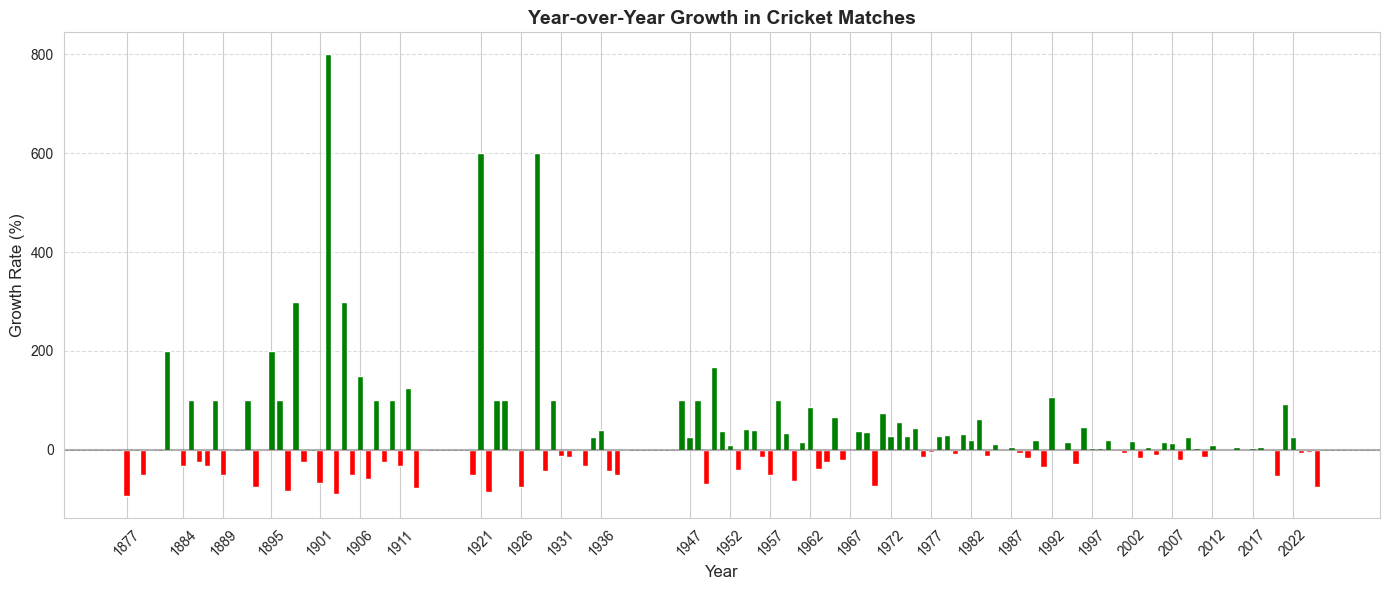

In [22]:
# Create a bar chart for year-over-year growth
plt.figure(figsize=(14, 6))
bars = plt.bar(yearly_counts['year'][1:], yearly_counts['Growth'][1:], 
        color=['g' if x > 0 else 'r' for x in yearly_counts['Growth'][1:]])

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Year-over-Year Growth in Cricket Matches', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.xticks(yearly_counts['year'][1::5], rotation=45)  # Show every 5th year

plt.tight_layout()
plt.show()

The bar chart illustrates the year-over-year growth rate of cricket matches.

1. **Positive Growth (Green Bars)**: 
   - Significant spikes in growth are observed in certain years, such as the early 1900s, 1920s, and post-1970s. These spikes may correspond to the introduction of new formats, increased scheduling, or global events boosting cricket's popularity.

   - The 1990s and early 2000s show consistent positive growth, reflecting the expansion of cricket formats like ODIs and the introduction of T20Is.

2. **Negative Growth (Red Bars)**:
   - Periods of decline are evident, particularly during global disruptions like World Wars (1914–1918, 1939–1945) and recent years (e.g., 2020s), possibly due to the COVID-19 pandemic or other scheduling challenges.

   - Negative growth indicates fewer matches played compared to the previous year.

3. **Fluctuations**:
   - The growth rate is highly volatile in the early years, likely due to the limited number of matches played annually.

   - In modern decades, growth stabilizes but still shows occasional dips, reflecting external factors affecting match scheduling.

**Conclusion**:   
The chart highlights the dynamic nature of cricket's growth, with periods of rapid expansion and occasional declines. Positive growth aligns with the introduction of new formats and increased global interest, while negative growth often coincides with global disruptions or scheduling constraints.

In [23]:
# Conclusion
recent_years = yearly_counts.tail(10)
avg_recent = recent_years['Count'].mean()
trend_direction = "increasing" if recent_years['Count'].iloc[-1] > recent_years['Count'].iloc[0] else "decreasing"

# Format-specific trends
format_recent = format_yearly[format_yearly['year'] >= yearly_counts['year'].max() - 10]
fastest_growing = format_recent.groupby('format')['Count'].sum().idxmax()

print("\nConclusion:")
print(f"The overall trend in cricket matches is {trend_direction} over the past decade.")
print(f"The average number of matches per year in the last decade is {avg_recent:.1f}.")
print(f"The format with the highest growth is {fastest_growing}, suggesting increased investment should be directed there.")
print("For optimal resource allocation, investment should follow the trend lines, with particular attention to formats showing consistent growth.")


Conclusion:
The overall trend in cricket matches is decreasing over the past decade.
The average number of matches per year in the last decade is 185.7.
The format with the highest growth is ODI , suggesting increased investment should be directed there.
For optimal resource allocation, investment should follow the trend lines, with particular attention to formats showing consistent growth.


> 1. Cricket has significantly increased over time, with sharp growth starting in the 1970s and peaking around 2015, followed by recent fluctuations.  

> 2. ODIs and T20Is are growing, with T20Is showing rapid growth since the 2000s, while Test matches have maintained a steady but slower growth.  

> 3. Resources should be allocated primarily to `ODIs` and `T20Is`, as they show consistent growth, while maintaining support for Test matches. 

> 4. Future efforts should focus on expanding T20Is due to their rapid growth and popularity, while addressing fluctuations in overall match frequency.  

----

### **3. Growth of T20Is & ODIs:**

In [24]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

In [25]:
data["format"].unique()

array(['Test ', 'ODI ', 'T20I '], dtype=object)

In [26]:
data.head()

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,2007-Nov,5,2007,Nov,India,False,6.0,0.0,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,2006-Jan,4,2006,Jan,Pakistan,False,0.0,341.0,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,2005-Mar,5,2005,Mar,India,False,0.0,168.0,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,2005-Mar,5,2005,Mar,India,False,0.0,195.0,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,2004-Apr,4,2004,Apr,Pakistan,False,0.0,131.0,False


In [27]:
data['format'].unique()

array(['Test ', 'ODI ', 'T20I '], dtype=object)

In [28]:
# In format column there is an space at the end of each values; remove it:
data["format"]= data["format"].str.strip()

In [29]:
# Filter data for short formats (T20I and ODI)
data[(data["format"]== "T20I") | (data["format"]== "ODI")]

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
59,India,Pakistan,India,6 wickets,Dubai (DICS),ODI,0,4847,0,2025-02-23,2025-Feb,1,2025,Feb,UAE,True,6.0,0.0,False
60,India,Pakistan,India,7 wickets,Ahmedabad,ODI,0,4669,0,2023-10-14,2023-Oct,1,2023,Oct,India,False,7.0,0.0,False
61,India,Pakistan,India,228 runs,Colombo (RPS),ODI,0,4639,0,2023-09-10,2023-Sep,2,2023,Sep,Sri Lanka,True,0.0,228.0,False
62,India,Pakistan,no result,NaN,Pallekele,ODI,0,4630,0,2023-09-02,2023-Sep,1,2023,Sep,Sri Lanka,True,0.0,0.0,False
63,India,Pakistan,India,89 runs,Manchester,ODI,0,4161,0,2019-06-16,2019-Jun,1,2019,Jun,England,True,0.0,89.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7787,West Indies,Zimbabwe,Zimbabwe,26 runs,Port of Spain,T20I,0,0,150,2010-02-28,2010-Feb,1,2010,Feb,West Indies,False,0.0,26.0,False
7789,Australia,ICC World XI,Australia,156 runs,Melbourne (Docklands),ODI,0,2284,0,2005-10-09,2005-Oct,1,2005,Oct,Australia,False,0.0,156.0,False
7790,Australia,ICC World XI,Australia,55 runs,Melbourne (Docklands),ODI,0,2283,0,2005-10-07,2005-Oct,1,2005,Oct,Australia,False,0.0,55.0,False
7791,Australia,ICC World XI,Australia,93 runs,Melbourne (Docklands),ODI,0,2282,0,2005-10-05,2005-Oct,1,2005,Oct,Australia,False,0.0,93.0,False


In [30]:
# We csn also use isin() function to seltect odi and t20i fromats:
short_formats= data[data["format"].isin(["T20I", "ODI"])]

In [31]:
# Ensure start_date is in datetime format:
if not pd.api.types.is_datetime64_any_dtype(short_formats['start_date']):
    short_formats['start_date'] = pd.to_datetime(short_formats['start_date'], errors='coerce')

In [32]:
short_formats.head()

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
59,India,Pakistan,India,6 wickets,Dubai (DICS),ODI,0,4847,0,2025-02-23,2025-Feb,1,2025,Feb,UAE,True,6.0,0.0,False
60,India,Pakistan,India,7 wickets,Ahmedabad,ODI,0,4669,0,2023-10-14,2023-Oct,1,2023,Oct,India,False,7.0,0.0,False
61,India,Pakistan,India,228 runs,Colombo (RPS),ODI,0,4639,0,2023-09-10,2023-Sep,2,2023,Sep,Sri Lanka,True,0.0,228.0,False
62,India,Pakistan,no result,NaN,Pallekele,ODI,0,4630,0,2023-09-02,2023-Sep,1,2023,Sep,Sri Lanka,True,0.0,0.0,False
63,India,Pakistan,India,89 runs,Manchester,ODI,0,4161,0,2019-06-16,2019-Jun,1,2019,Jun,England,True,0.0,89.0,False


In [33]:
# Extract year from start_date:
short_formats['year'] = short_formats['start_date'].dt.year

In [34]:
# Count matches by year and format
format_yearly = short_formats.groupby(['year', 'format']).size().reset_index(name='Count')
format_yearly

,year,format,Count
0,1971,ODI,1
1,1972,ODI,3
2,1973,ODI,5
3,1974,ODI,6
4,1975,ODI,16
...,...,...,...
71,2023,T20I,68
72,2024,ODI,55
73,2024,T20I,114
74,2025,ODI,31


In [35]:
# Pivot the data for easier plotting:
format_pivot = format_yearly.pivot(index='year', columns='format', values='Count').fillna(0)
format_pivot

format,ODI,T20I
year,,
1971,1.0,0.0
1972,3.0,0.0
1973,5.0,0.0
1974,6.0,0.0
1975,16.0,0.0
1976,6.0,0.0
1977,6.0,0.0
1978,10.0,0.0
1979,23.0,0.0


In [36]:
# Calculate cumulative sums for each format:
format_pivot_cumsum = format_pivot.cumsum()
format_pivot_cumsum

format,ODI,T20I
year,,
1971,1.0,0.0
1972,4.0,0.0
1973,9.0,0.0
1974,15.0,0.0
1975,31.0,0.0
1976,37.0,0.0
1977,43.0,0.0
1978,53.0,0.0
1979,76.0,0.0


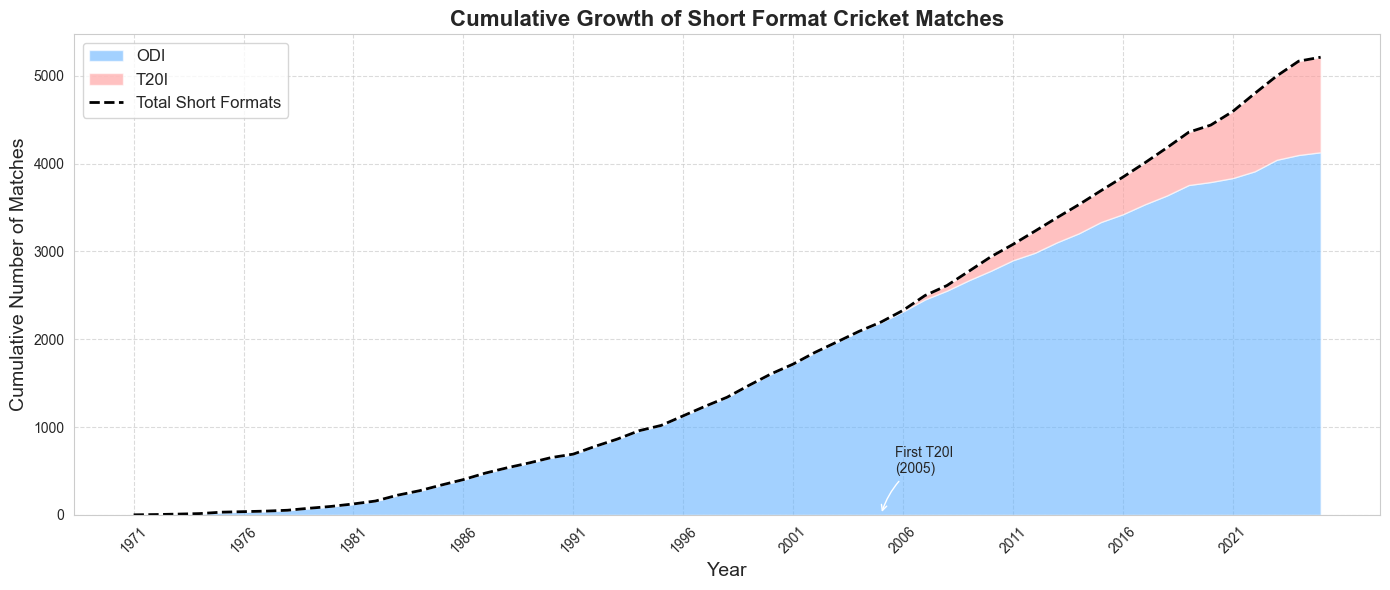

In [37]:
# Create an area chart:
plt.figure(figsize=(14, 6))
plt.stackplot(format_pivot_cumsum.index, 
              format_pivot_cumsum['ODI'], format_pivot_cumsum['T20I'],
              labels=['ODI', 'T20I'],
              colors=['#66b3ff', '#ff9999'],
              alpha=0.6)

# Add a line for total cumulative matches
plt.plot(format_pivot_cumsum.index, 
         format_pivot_cumsum['ODI'] + format_pivot_cumsum['T20I'], 
         'k--', linewidth=2, label='Total Short Formats')

# Add title and labels
plt.title('Cumulative Growth of Short Format Cricket Matches', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Number of Matches', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Improve x-axis ticks
plt.xticks(format_pivot_cumsum.index[::5], rotation=45)  # Show every 5th year

# Add annotations for key milestones
t20_start = format_pivot[format_pivot['T20I'] > 0].index.min()
if not pd.isna(t20_start):
    plt.annotate(f'First T20I\n({t20_start})', 
                xy=(t20_start, format_pivot_cumsum.loc[t20_start, 'T20I']),
                xytext=(10, 30), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.tight_layout()
plt.show()

This illustrates the **`cumulative growth of short-format cricket matches (ODIs and T20Is)`** over time:

1. **ODIs (blue area)**: 
   - ODIs began in the 1970s and have shown steady growth, dominating the short-format landscape for decades.
   - The growth rate is consistent, with a significant rise in the 1990s and 2000s.

2. **T20Is (pink area)**:
   - T20Is started in **2005** (annotated on the plot) and have grown rapidly since their introduction.
   - While still trailing ODIs in total matches, their growth trajectory is steep, reflecting their increasing popularity.

3. **Total Short Formats (dashed line)**:
   - The total number of short-format matches has risen sharply, particularly after the 2000s, driven by the introduction and expansion of T20Is.

> - T20Is are growing faster than ODIs, indicating a shift in audience preference toward shorter, fast-paced formats.
> 
> - The cumulative growth highlights the increasing focus on short formats in modern cricket.


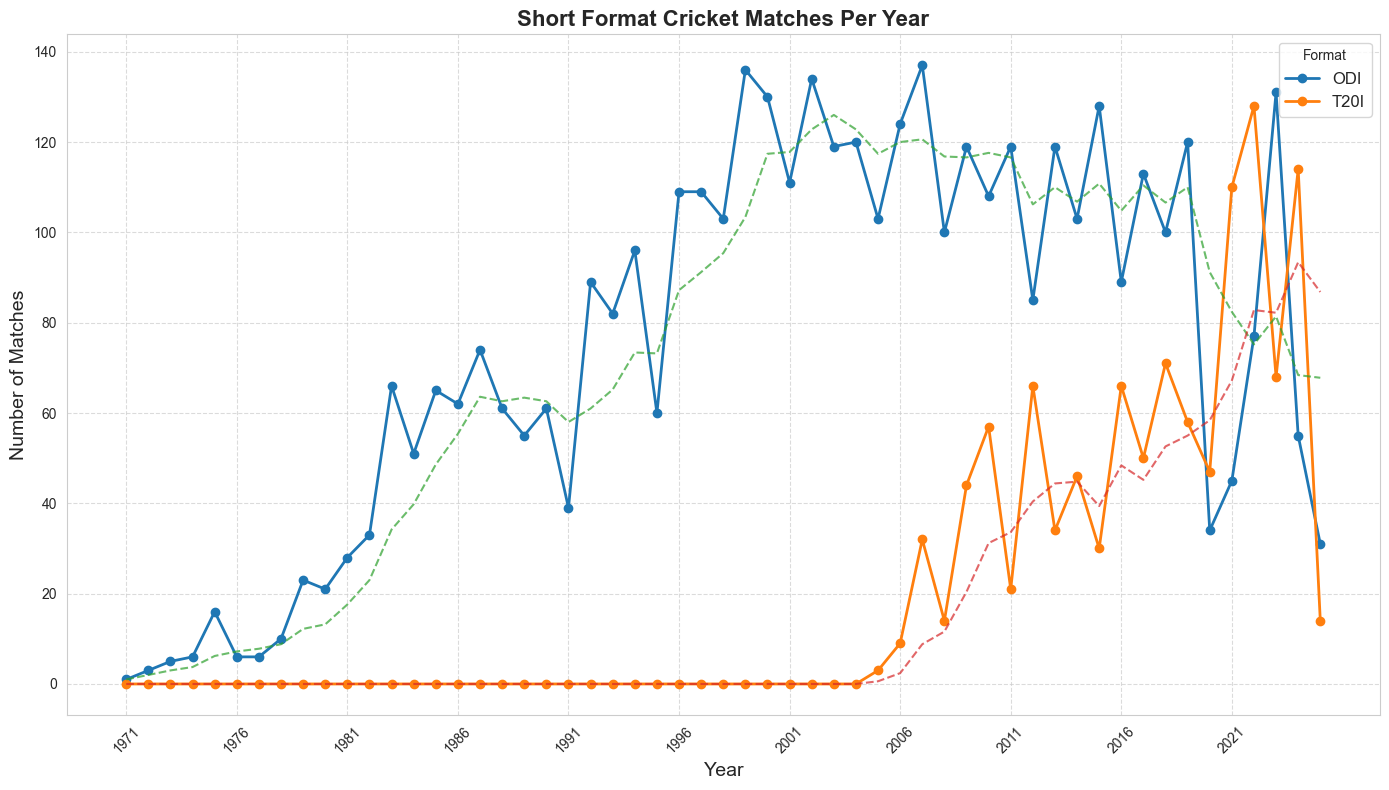

In [38]:
# Create a line chart showing yearly matches (not cumulative)
plt.figure(figsize=(14, 8))
for column in format_pivot.columns:
    plt.plot(format_pivot.index, format_pivot[column], marker='o', linewidth=2, label=column)

plt.title('Short Format Cricket Matches Per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.legend(title='Format', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(format_pivot.index[::5], rotation=45)  # Show every 5th year

# Calculate and plot 5-year moving averages
for column in format_pivot.columns:
    ma = format_pivot[column].rolling(window=5, min_periods=1).mean()
    plt.plot(format_pivot.index, ma, linestyle='--', linewidth=1.5, alpha=0.7, label=f'{column} (5-yr MA)')

plt.tight_layout()
plt.show()

This shows the yearly trends of ODI and T20I matches:

1. **ODIs (blue line)**: 
   - Began in the 1970s and saw steady growth, peaking around the 2010s.
   - Recent years show fluctuations and a slight decline.

2. **T20Is (orange line)**: 
   - Introduced in 2005, with rapid growth surpassing ODIs in recent years.
   - Indicates increasing popularity of the shorter format.

3. **Moving Averages (dashed lines)**: 
   - Highlight overall trends, showing T20Is' consistent rise and ODIs' stabilization or decline.

> T20Is are growing rapidly, while ODIs are stabilizing, reflecting a shift in audience preference toward shorter formats.

In [39]:
# Calculate growth rates for each format
growth_rates = {}
for format_type in ['ODI', 'T20I']:
    if format_type in format_pivot.columns:
        # Get first and last 5 years of data
        first_5_years = format_pivot[format_type].head(5).mean()
        last_5_years = format_pivot[format_type].tail(5).mean()
        
        # Calculate growth rate
        if first_5_years > 0:
            growth_rate = ((last_5_years - first_5_years) / first_5_years) * 100
            growth_rates[format_type] = growth_rate

# Calculate percentage of total matches for each format in recent years
recent_years = format_yearly[format_yearly['year'] >= format_yearly['year'].max() - 5]
recent_total = recent_years.groupby('format')['Count'].sum()
recent_percentage = (recent_total / recent_total.sum() * 100).round(1)

In [40]:
print(recent_years)

    year format  Count
64  2020    ODI     34
65  2020   T20I     47
66  2021    ODI     45
67  2021   T20I    110
68  2022    ODI     77
69  2022   T20I    128
70  2023    ODI    131
71  2023   T20I     68
72  2024    ODI     55
73  2024   T20I    114
74  2025    ODI     31
75  2025   T20I     14


In [41]:
print(recent_total)

format
ODI     373
T20I    481
Name: Count, dtype: int64


In [42]:
print(recent_percentage)

format
ODI     43.7
T20I    56.3
Name: Count, dtype: float64


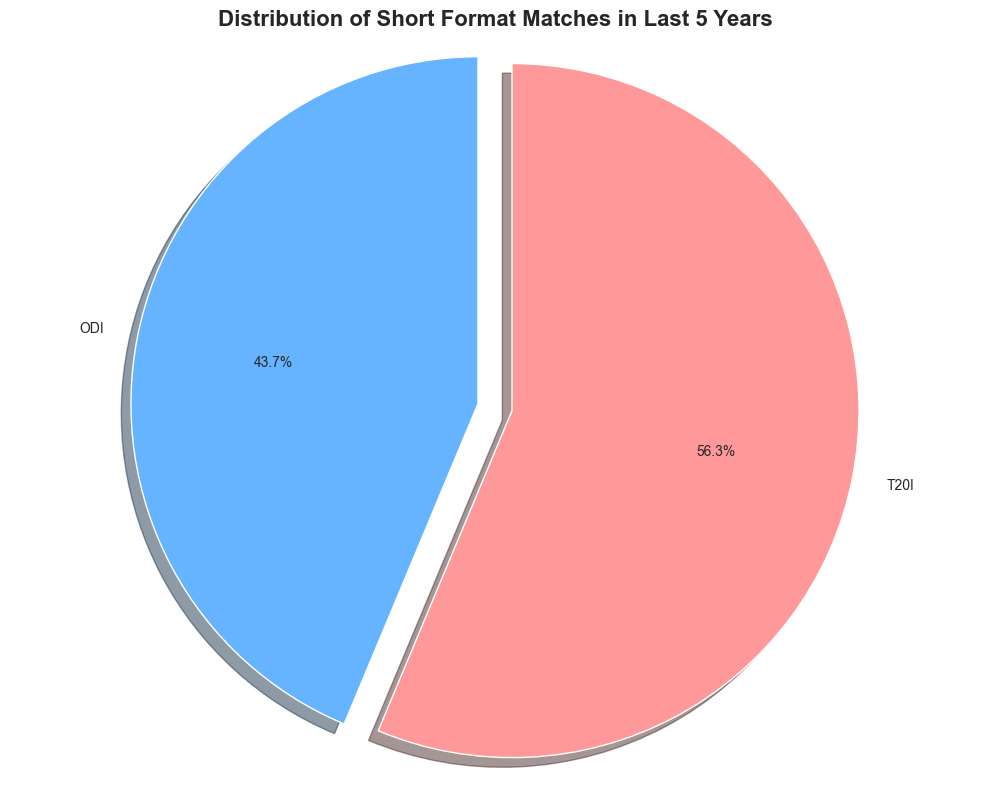

In [43]:
# Create a pie chart for recent distribution
plt.figure(figsize=(10, 8))
plt.pie(recent_percentage, 
        labels=recent_percentage.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        explode=[0.05, 0.05],
        shadow=True)
plt.title('Distribution of Short Format Matches in Last 5 Years', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

This pie chart shows the distribution of short-format cricket matches (ODIs and T20Is) in the last 5 years:

- **T20Is (56.3%)**: T20Is dominate, reflecting their growing popularity and preference for shorter, fast-paced formats.

- **ODIs (43.7%)**: ODIs remain significant but are now secondary to T20Is.

> T20Is have surpassed ODIs in recent years, indicating a shift in audience and scheduling priorities toward T20Is.

In [44]:
# Conclusion
print("\nConclusion:")
print("Short Format Cricket Growth Analysis:")
for format_type, growth in growth_rates.items():
    print(f"- {format_type} matches have grown by {growth:.1f}% from early years to recent years.")

fastest_growing = max(growth_rates.items(), key=lambda x: x[1])[0] if growth_rates else "N/A"
most_played_recent = recent_percentage.idxmax() if not recent_percentage.empty else "N/A"

print(f"\nThe fastest growing short format is {fastest_growing}.")
print(f"The most played short format in recent years is {most_played_recent} ({recent_percentage.get(most_played_recent, 0):.1f}% of short format matches).")
print("\nRecommendations for Decision Makers:")
print("1. Marketing campaigns should highlight the excitement and pace of short format cricket, especially T20Is.")
print("2. Resource allocation should prioritize the development of facilities suitable for short format matches.")
print("3. Broadcasting strategies should focus on maximizing viewership during peak T20I and ODI seasons.")
print("4. Player development programs should emphasize skills particularly valuable in short format cricket.")


Conclusion:
Short Format Cricket Growth Analysis:
- ODI matches have grown by 993.5% from early years to recent years.

The fastest growing short format is ODI.
The most played short format in recent years is T20I (56.3% of short format matches).

Recommendations for Decision Makers:
1. Marketing campaigns should highlight the excitement and pace of short format cricket, especially T20Is.
2. Resource allocation should prioritize the development of facilities suitable for short format matches.
3. Broadcasting strategies should focus on maximizing viewership during peak T20I and ODI seasons.
4. Player development programs should emphasize skills particularly valuable in short format cricket.


----

## 4. **Top Host Countries:**

1. Group data by `ground_country` to `count matches` hosted by each nation:

In [45]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

In [46]:
data.head()

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,2007-Nov,5,2007,Nov,India,False,6.0,0.0,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,2006-Jan,4,2006,Jan,Pakistan,False,0.0,341.0,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,2005-Mar,5,2005,Mar,India,False,0.0,168.0,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,2005-Mar,5,2005,Mar,India,False,0.0,195.0,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,2004-Apr,4,2004,Apr,Pakistan,False,0.0,131.0,False


In [47]:
# Group by ground_country and count matches
host_counts = data['ground_country'].value_counts().reset_index()
host_counts.columns = ['Country', 'Matches_Hosted']
host_counts

,Country,Matches_Hosted
0,Australia,1078
1,England,908
2,India,738
3,West Indies,582
4,Sri Lanka,564
5,South Africa,520
6,New Zealand,488
7,UAE,434
8,Unknown,405
9,Bangladesh,389


In [48]:
# Calculate percentage of total matches
total_matches = host_counts['Matches_Hosted'].sum()
host_counts['Percentage'] = (host_counts['Matches_Hosted'] / total_matches * 100).round(1)
host_counts

,Country,Matches_Hosted,Percentage
0,Australia,1078,15.4
1,England,908,13.0
2,India,738,10.5
3,West Indies,582,8.3
4,Sri Lanka,564,8.1
5,South Africa,520,7.4
6,New Zealand,488,7.0
7,UAE,434,6.2
8,Unknown,405,5.8
9,Bangladesh,389,5.6


In [49]:
# Display the top 15 host countries
top_hosts = host_counts.head(15).copy()
print("Top 15 Cricket Host Countries:")
top_hosts

Top 15 Cricket Host Countries:


,Country,Matches_Hosted,Percentage
0,Australia,1078,15.4
1,England,908,13.0
2,India,738,10.5
3,West Indies,582,8.3
4,Sri Lanka,564,8.1
5,South Africa,520,7.4
6,New Zealand,488,7.0
7,UAE,434,6.2
8,Unknown,405,5.8
9,Bangladesh,389,5.6


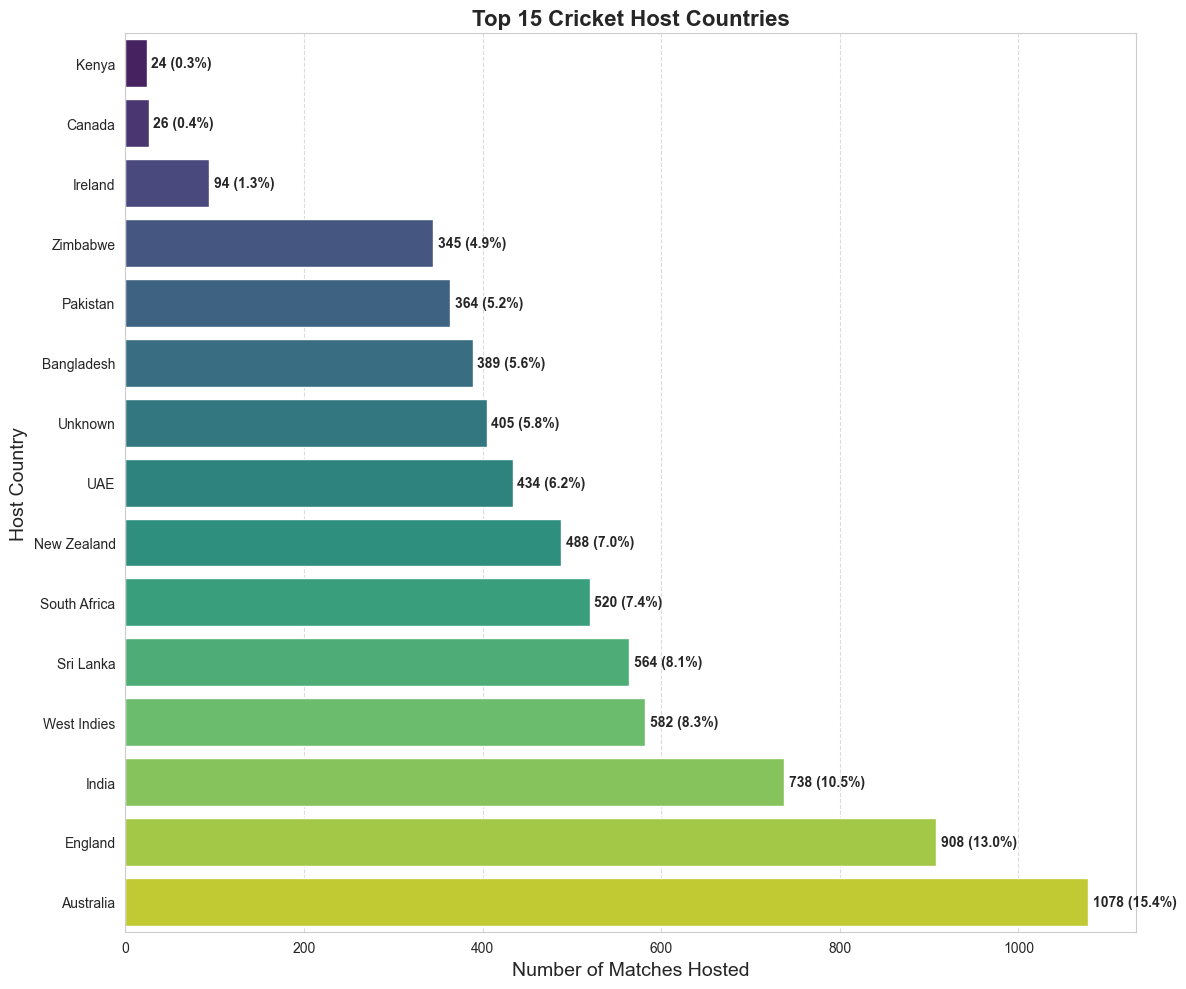

In [50]:
# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    x='Matches_Hosted', 
    y='Country', 
    data=top_hosts.sort_values('Matches_Hosted'),
    palette='viridis'
)

# Add match count and percentage labels to the bars
for i, (matches, percentage) in enumerate(zip(top_hosts.sort_values('Matches_Hosted')['Matches_Hosted'], 
                                             top_hosts.sort_values('Matches_Hosted')['Percentage'])):
    ax.text(matches + 5, i, f"{matches} ({percentage}%)", va='center', fontweight='bold')

# Customize the plot
plt.title('Top 15 Cricket Host Countries', fontsize=16, fontweight='bold')
plt.xlabel('Number of Matches Hosted', fontsize=14)
plt.ylabel('Host Country', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [51]:
# Create a more detailed analysis by format
# Group by country and format
format_by_country = data.groupby(['ground_country', 'format']).size().reset_index(name='Matches')
format_by_country

,ground_country,format,Matches
0,Australia,ODI,625
1,Australia,T20I,90
2,Australia,Test,363
3,Bangladesh,ODI,233
4,Bangladesh,T20I,88
5,Bangladesh,Test,68
6,Canada,ODI,22
7,Canada,T20I,4
8,China,T20I,5
9,England,ODI,456


In [52]:
# Get top 10 countries by total matches
top10_countries = host_counts.head(10)['Country'].tolist()
top10_countries

['Australia',
 'England',
 'India',
 'West Indies',
 'Sri Lanka',
 'South Africa',
 'New Zealand',
 'UAE',
 'Unknown',
 'Bangladesh']

In [53]:
# Filter for top 10 countries
top_countries_formats = format_by_country[format_by_country['ground_country'].isin(top10_countries)]
top_countries_formats

,ground_country,format,Matches
0,Australia,ODI,625
1,Australia,T20I,90
2,Australia,Test,363
3,Bangladesh,ODI,233
4,Bangladesh,T20I,88
5,Bangladesh,Test,68
9,England,ODI,456
10,England,T20I,80
11,England,Test,372
12,India,ODI,453


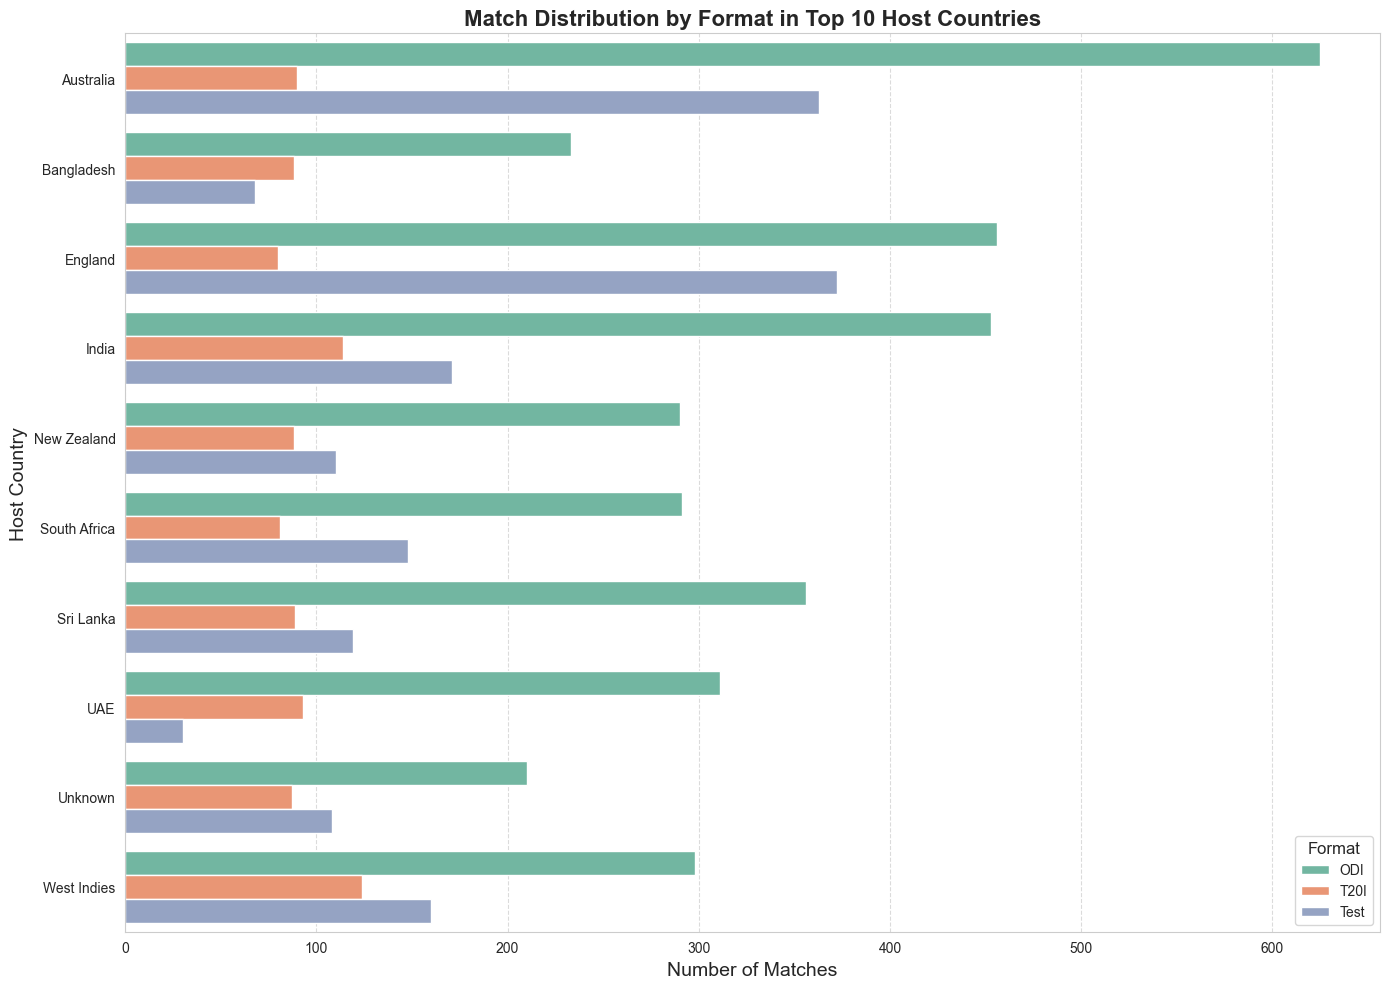

In [54]:
# Create a stacked bar chart
plt.figure(figsize=(14, 10))
chart = sns.barplot(
    x='Matches', 
    y='ground_country', 
    hue='format',
    data=top_countries_formats,
    palette='Set2',
    dodge=True
)

# Customize the plot
plt.title('Match Distribution by Format in Top 10 Host Countries', fontsize=16, fontweight='bold')
plt.xlabel('Number of Matches', fontsize=14)
plt.ylabel('Host Country', fontsize=14)
plt.legend(title='Format', title_fontsize=12, fontsize=10, loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Seaborn does not support True Stacked Plots. For this we nwwd to use Matplotlib.

In [55]:
# Calculate hosting frequency over time
# Group by country and year
hosting_trends = data.groupby(['ground_country', 'year']).size().reset_index(name='Matches')

# Filter for top 5 countries
top5_countries = host_counts.head(5)['Country'].tolist()
top5_trends = hosting_trends[hosting_trends['ground_country'].isin(top5_countries)]

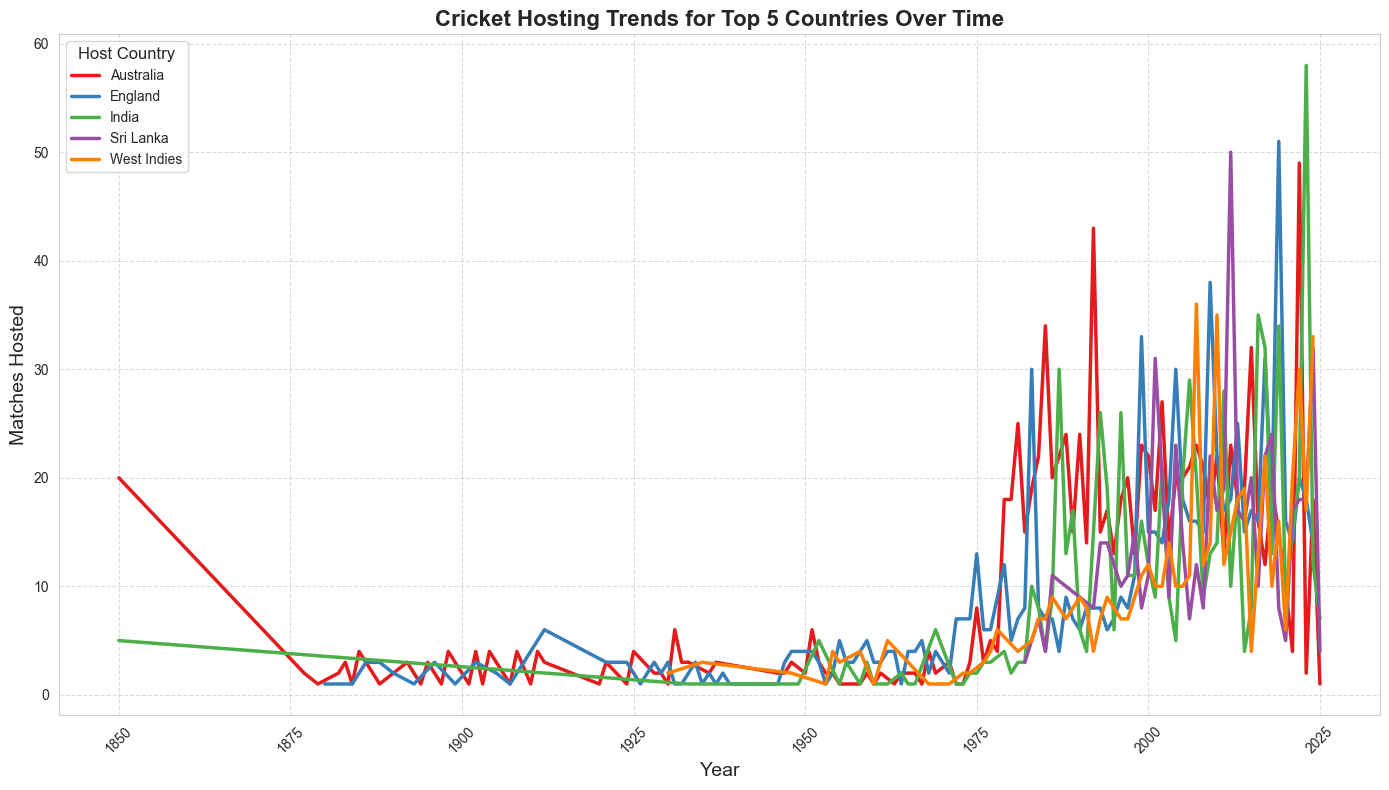

In [56]:
# Create a line plot for hosting trends
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='year', 
    y='Matches', 
    hue='ground_country',
    data=top5_trends,
    palette='Set1',
    linewidth=2.5,
    markers=True
)

# Customize the plot
plt.title('Cricket Hosting Trends for Top 5 Countries Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Matches Hosted', fontsize=14)
plt.legend(title='Host Country', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
# Calculate average attendance or capacity by country (if available)
# If not available, we can analyze neutral ground matches
neutral_matches = data[data['is_neutral_ground'] == True].groupby('ground_country').size().reset_index(name='Neutral_Matches')
neutral_percentage = pd.merge(host_counts, neutral_matches, left_on='Country', right_on='ground_country', how='left')
neutral_percentage['Neutral_Matches'] = neutral_percentage['Neutral_Matches'].fillna(0)
neutral_percentage['Neutral_Percentage'] = (neutral_percentage['Neutral_Matches'] / neutral_percentage['Matches_Hosted'] * 100).round(1)

# Display top 10 countries with neutral match percentage
top_neutral = neutral_percentage.sort_values('Neutral_Matches', ascending=False).head(10)
print("\nTop 10 Countries Hosting Neutral Matches:")
print(top_neutral[['Country', 'Matches_Hosted', 'Neutral_Matches', 'Neutral_Percentage']])


Top 10 Countries Hosting Neutral Matches:
         Country  Matches_Hosted  Neutral_Matches  Neutral_Percentage
7            UAE             434              434               100.0
8        Unknown             405              405               100.0
0      Australia            1078              201                18.6
1        England             908              164                18.1
2          India             738              152                20.6
4      Sri Lanka             564               78                13.8
9     Bangladesh             389               67                17.2
3    West Indies             582               61                10.5
5   South Africa             520               58                11.2
10      Pakistan             364               31                 8.5


In [58]:
# Conclusion and recommendations
print("\nConclusion:")
top_host = host_counts.iloc[0]['Country']
top_host_matches = host_counts.iloc[0]['Matches_Hosted']
top_host_percentage = host_counts.iloc[0]['Percentage']

print(f"The top cricket hosting nation is {top_host} with {top_host_matches} matches ({top_host_percentage}% of all matches).")
print(f"The top 5 countries ({', '.join(top5_countries)}) account for {host_counts.head(5)['Percentage'].sum():.1f}% of all cricket matches.")

# Calculate recent hosting trends (last 5 years)
recent_years = data[data['year'] >= data['year'].max() - 5]
recent_hosts = recent_years['ground_country'].value_counts().reset_index()
recent_hosts.columns = ['Country', 'Recent_Matches']
recent_top = recent_hosts.head(5)['Country'].tolist()


Conclusion:
The top cricket hosting nation is Australia with 1078 matches (15.4% of all matches).
The top 5 countries (Australia, England, India, West Indies, Sri Lanka) account for 55.3% of all cricket matches.


In [59]:
print("\nRecommendations for Decision Makers:")
print(f"1. Primary venues for major tournaments should be located in {', '.join(top5_countries)}, with {top_host} as the focal point.\n")
print(f"2. Emerging cricket nations should be given opportunities to \n host matches to grow the sport globally.\n")
print(f"3. Recent hosting trends show {', '.join(recent_top)} as active \n venues, making them suitable for upcoming events.\n")
print("4. Consider the format distribution when allocating matches - some\n countries have better facilities or audience for specific formats.\n")
print("5. Countries with high neutral match hosting experience are ideal \nfor multinational tournaments.\n")


Recommendations for Decision Makers:
1. Primary venues for major tournaments should be located in Australia, England, India, West Indies, Sri Lanka, with Australia as the focal point.

2. Emerging cricket nations should be given opportunities to 
 host matches to grow the sport globally.

3. Recent hosting trends show India, West Indies, Sri Lanka, Australia, England as active 
 venues, making them suitable for upcoming events.

4. Consider the format distribution when allocating matches - some
 countries have better facilities or audience for specific formats.

5. Countries with high neutral match hosting experience are ideal 
for multinational tournaments.



-----

## 5. **Neutral Ground Matches:**

**1. `Filter data for neutral ground matches and perform initial analysis:`**  
First, filter the dataset to include only matches played on neutral grounds and examine the basic statistics.

In [60]:
# Filter data for neutral ground matches
neutral_matches = data[data['is_neutral_ground'] == True].copy()
neutral_matches

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
59,India,Pakistan,India,6 wickets,Dubai (DICS),ODI,0,4847,0,2025-02-23,2025-Feb,1,2025,Feb,UAE,True,6.0,0.0,False
61,India,Pakistan,India,228 runs,Colombo (RPS),ODI,0,4639,0,2023-09-10,2023-Sep,2,2023,Sep,Sri Lanka,True,0.0,228.0,False
62,India,Pakistan,no result,NaN,Pallekele,ODI,0,4630,0,2023-09-02,2023-Sep,1,2023,Sep,Sri Lanka,True,0.0,0.0,False
63,India,Pakistan,India,89 runs,Manchester,ODI,0,4161,0,2019-06-16,2019-Jun,1,2019,Jun,England,True,0.0,89.0,False
64,India,Pakistan,India,9 wickets,Dubai (DICS),ODI,0,4044,0,2018-09-23,2018-Sep,1,2018,Sep,UAE,True,9.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,West Indies,Zimbabwe,West Indies,75 runs,Brisbane,ODI,0,724,0,1992-02-29,1992-Feb,1,1992,Feb,Australia,True,0.0,75.0,False
7782,West Indies,Zimbabwe,West Indies,10 wickets,Birmingham,ODI,0,220,0,1983-06-20,1983-Jun,1,1983,Jun,England,True,10.0,0.0,False
7783,West Indies,Zimbabwe,West Indies,8 wickets,Worcester,ODI,0,208,0,1983-06-13,1983-Jun,1,1983,Jun,England,True,8.0,0.0,False
7784,West Indies,Zimbabwe,West Indies,31 runs,Hobart,T20I,0,0,1834,2022-10-19,2022-Oct,1,2022,Oct,Australia,True,0.0,31.0,False


In [61]:
# Display basic statistics about neutral matches:
total_matches = len(data)
neutral_count = len(neutral_matches)
neutral_percentage = (neutral_count / total_matches * 100).__round__(1)
neutral_percentage

25.6

In [62]:
print(f"Total matches in dataset: {total_matches}")
print(f"Matches played on neutral grounds: {neutral_count} ({neutral_percentage}%)")

Total matches in dataset: 7002
Matches played on neutral grounds: 1790 (25.6%)


In [63]:
# Check distribution by format
neutral_by_format = neutral_matches['format'].value_counts().reset_index()
neutral_by_format.columns = ['Format', 'Neutral_Matches']
neutral_by_format['Percentage'] = (neutral_by_format['Neutral_Matches'] / neutral_count * 100).round(1)

print("\nNeutral Matches by Format:")
print(neutral_by_format)


Neutral Matches by Format:
  Format  Neutral_Matches  Percentage
0    ODI             1279        71.5
1   T20I              361        20.2
2   Test              150         8.4


**2. `Create a stacked bar chart showing neutral matches by format:`**  

Now, let's visualize the distribution of neutral matches by format using a stacked bar chart. This will help us understand which formats are more commonly played on neutral grounds.

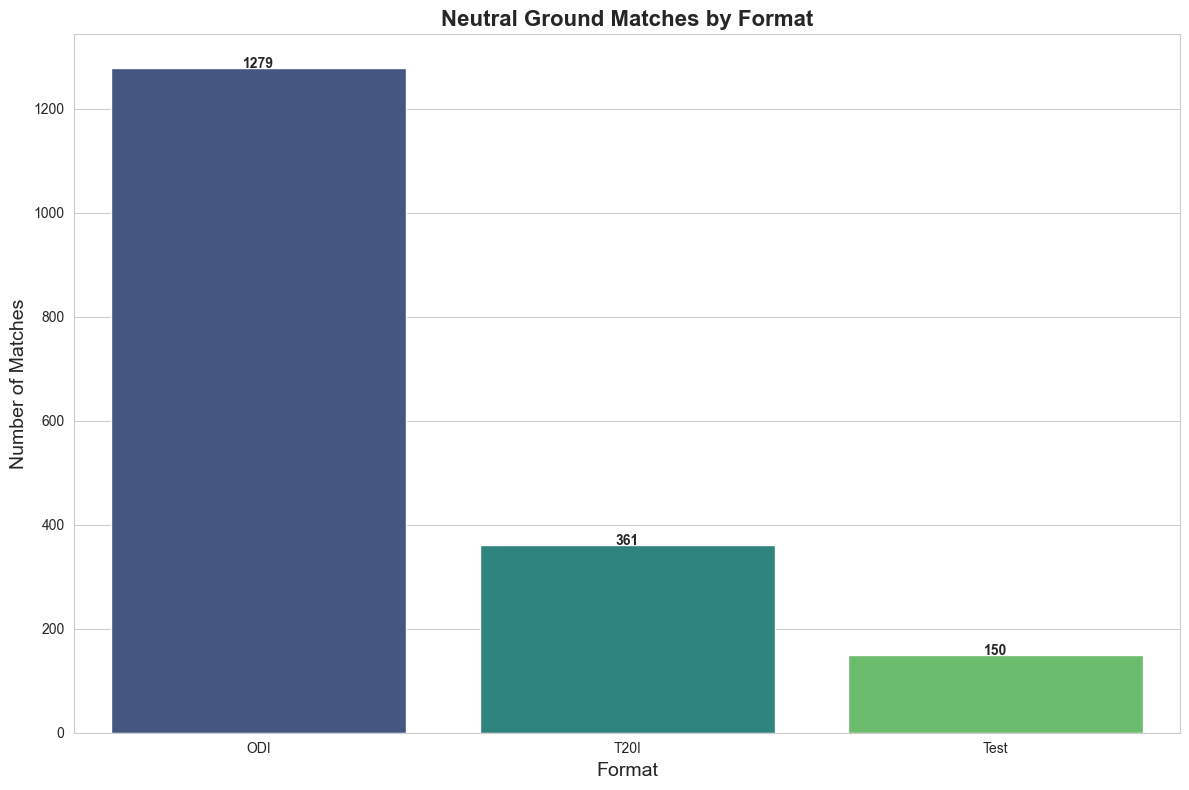

In [64]:
# Create a bar chart showing neutral matches by format:

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create a bar chart
ax = sns.countplot(
    data=neutral_matches,
    x='format',
    palette='viridis',
    order=neutral_by_format['Format']  # Order by frequency
)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            f'{int(height)}',
            ha="center", fontweight='bold')

# Customize the plot
plt.title('Neutral Ground Matches by Format', fontsize=16, fontweight='bold')
plt.xlabel('Format', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**3. ` Analyze neutral matches by host country:`**

Let's examine which countries are hosting the most neutral matches. This will help identify popular neutral venues:

In [65]:
# Analyze neutral matches by host country:

# Group by host country and count matches
neutral_hosts = neutral_matches.groupby('ground_country').size().reset_index(name='Match_Count')
neutral_hosts = neutral_hosts.sort_values('Match_Count', ascending=False).head(10)  # Top 10 neutral hosts
neutral_hosts

,ground_country,Match_Count
17,UAE,434
19,Unknown,405
0,Australia,201
4,England,164
5,India,152
16,Sri Lanka,78
1,Bangladesh,67
20,West Indies,61
15,South Africa,58
12,Pakistan,31


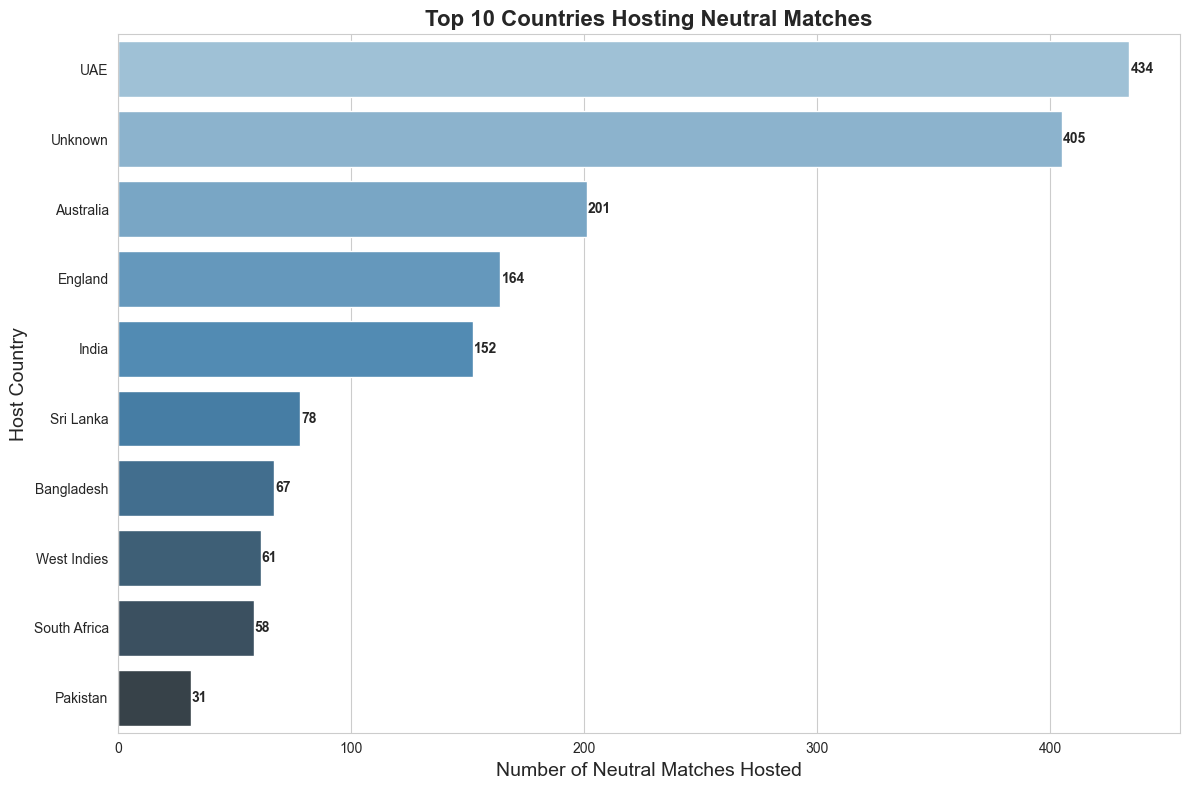

In [66]:
# Create a horizontal bar chart:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Match_Count',
    y='ground_country',
    data=neutral_hosts,
    palette='Blues_d'
)

# Add count labels to the bars
for i, v in enumerate(neutral_hosts['Match_Count']):
    ax.text(v + 0.5, i, str(v), va='center', fontweight='bold')

# Customize the plot
plt.title('Top 10 Countries Hosting Neutral Matches', fontsize=16, fontweight='bold')
plt.xlabel('Number of Neutral Matches Hosted', fontsize=14)
plt.ylabel('Host Country', fontsize=14)
plt.tight_layout()
plt.show()

**4. `Stacked bar chart showing format distribution by top neutral hosts:`**  

Now, let's analyze how different formats are distributed among the top neutral hosting countries:

In [67]:
# Get top 5 neutral hosting countries
top5_neutral_hosts = neutral_hosts.head(5)['ground_country'].tolist()
top5_neutral_hosts

['UAE', 'Unknown', 'Australia', 'England', 'India']

In [68]:
# Filter data for top 5 neutral hosts
top_hosts_data = neutral_matches[neutral_matches['ground_country'].isin(top5_neutral_hosts)]
top_hosts_data

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
59,India,Pakistan,India,6 wickets,Dubai (DICS),ODI,0,4847,0,2025-02-23,2025-Feb,1,2025,Feb,UAE,True,6.0,0.0,False
63,India,Pakistan,India,89 runs,Manchester,ODI,0,4161,0,2019-06-16,2019-Jun,1,2019,Jun,England,True,0.0,89.0,False
64,India,Pakistan,India,9 wickets,Dubai (DICS),ODI,0,4044,0,2018-09-23,2018-Sep,1,2018,Sep,UAE,True,9.0,0.0,False
65,India,Pakistan,India,8 wickets,Dubai (DICS),ODI,0,4040,0,2018-09-19,2018-Sep,1,2018,Sep,UAE,True,8.0,0.0,False
66,India,Pakistan,Pakistan,180 runs,The Oval,ODI,0,3894,0,2017-06-18,2017-Jun,1,2017,Jun,England,True,0.0,180.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,West Indies,Zimbabwe,West Indies,75 runs,Brisbane,ODI,0,724,0,1992-02-29,1992-Feb,1,1992,Feb,Australia,True,0.0,75.0,False
7782,West Indies,Zimbabwe,West Indies,10 wickets,Birmingham,ODI,0,220,0,1983-06-20,1983-Jun,1,1983,Jun,England,True,10.0,0.0,False
7783,West Indies,Zimbabwe,West Indies,8 wickets,Worcester,ODI,0,208,0,1983-06-13,1983-Jun,1,1983,Jun,England,True,8.0,0.0,False
7784,West Indies,Zimbabwe,West Indies,31 runs,Hobart,T20I,0,0,1834,2022-10-19,2022-Oct,1,2022,Oct,Australia,True,0.0,31.0,False


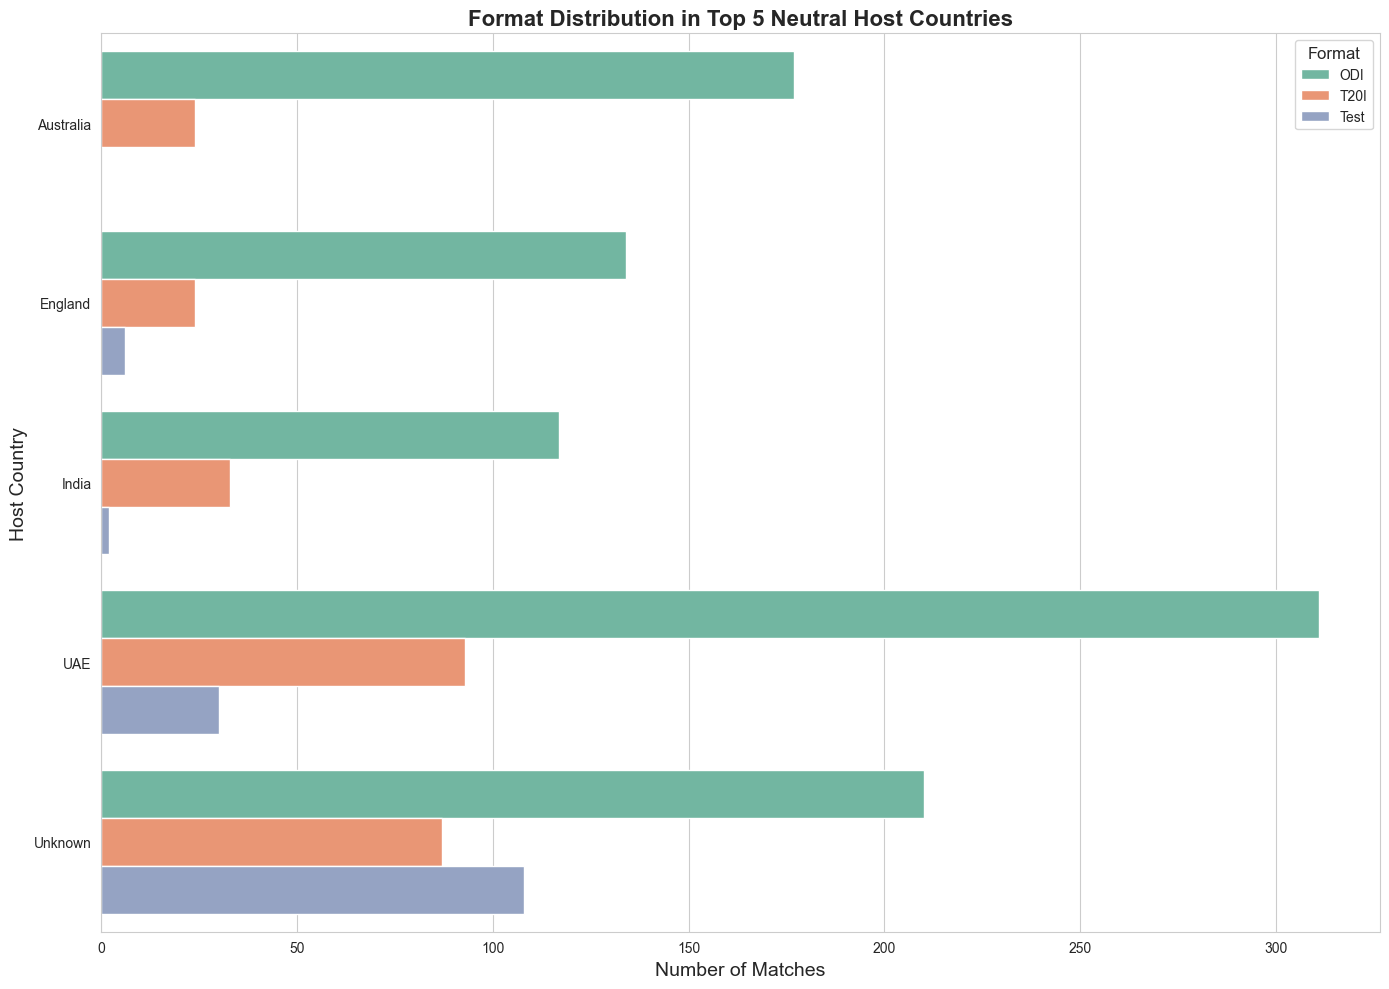

In [69]:
# Create a stacked bar chart
plt.figure(figsize=(14, 10))
format_by_host = top_hosts_data.groupby(['ground_country', 'format']).size().reset_index(name='Count')

# Create the stacked bar chart using seaborn
chart = sns.barplot(
    x='Count',
    y='ground_country',
    hue='format',
    data=format_by_host,
    palette='Set2'
)

# Customize the plot
plt.title('Format Distribution in Top 5 Neutral Host Countries', fontsize=16, fontweight='bold')
plt.xlabel('Number of Matches', fontsize=14)
plt.ylabel('Host Country', fontsize=14)
plt.legend(title='Format', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

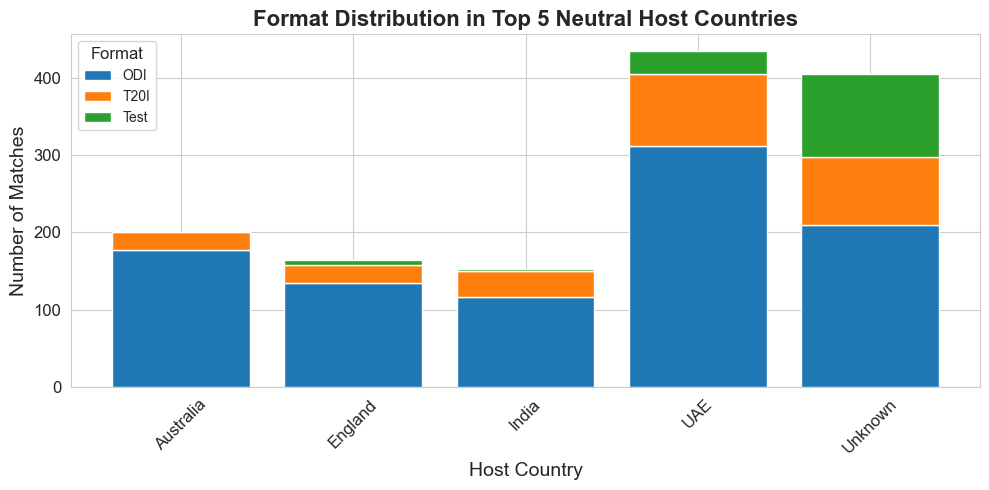

In [74]:
# Group data by 'ground_country' and 'format'
format_by_host1 = top_hosts_data.groupby(['ground_country', 'format']).size().reset_index(name='Count')

# Pivot the data to prepare for stacking
pivot_data1 = format_by_host1.pivot(index='ground_country', columns='format', values='Count').fillna(0)

# Create a stacked bar chart
plt.figure(figsize=(10, 5))
bottom = None

# Iterate through each format and stack the bars
for format_type in pivot_data1.columns:
    plt.bar(
        pivot_data1.index, 
        pivot_data1[format_type], 
        bottom=bottom, 
        label=format_type
    )
    # Update the bottom for stacking
    bottom = pivot_data1[format_type] if bottom is None else bottom + pivot_data1[format_type]

# Customize the plot
plt.title('Format Distribution in Top 5 Neutral Host Countries', fontsize=16, fontweight='bold')
plt.xlabel('Host Country', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Format', title_fontsize=12, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

**5. `Analyze trends in neutral ground usage over time:`**


Let's examine how the use of neutral grounds has evolved over time to identify any trends:

In [ ]:
# Step 5: Analyze trends in neutral ground usage over time
# Group by year and count neutral matches
neutral_by_year = neutral_matches.groupby('year').size().reset_index(name='Neutral_Count')

# Get total matches by year for comparison
total_by_year = data.groupby('year').size().reset_index(name='Total_Count')

# Merge the two dataframes
yearly_comparison = pd.merge(total_by_year, neutral_by_year, on='year', how='left')
yearly_comparison['Neutral_Count'] = yearly_comparison['Neutral_Count'].fillna(0)
yearly_comparison['Neutral_Percentage'] = (yearly_comparison['Neutral_Count'] / yearly_comparison['Total_Count'] * 100).round(1)

# Create a line plot showing neutral match trends
plt.figure(figsize=(14, 8))

# Create a twin axis plot
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot total matches and neutral matches
sns.lineplot(x='year', y='Total_Count', data=yearly_comparison, ax=ax1, color='blue', label='Total Matches')
sns.lineplot(x='year', y='Neutral_Count', data=yearly_comparison, ax=ax1, color='red', label='Neutral Matches')

# Plot percentage on secondary axis
sns.lineplot(x='year', y='Neutral_Percentage', data=yearly_comparison, ax=ax2, color='green', label='Neutral %')

# Customize the plot
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Matches', fontsize=14)
ax2.set_ylabel('Percentage of Neutral Matches', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Trend of Neutral Ground Matches Over Time', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_comparison['year'][::5], rotation=45)  # Show every 5th year
plt.tight_layout()
plt.show()